In [37]:
import numpy as np
import pandas as pd

In [38]:
df_clv=pd.read_csv('df_clv.csv')
df_clv.head()

,age,gender,security_no,joining_date,joined_through_referral,referral_id,last_visit_time,days_since_last_login,avg_session_duration,avg_transaction_value,...,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website,Churn_probability
0,0.148148,0,XW0DQ7H,17-08-2017,0,xxxxxxxx,16:08:02,0.991220,0.514859,0.526717,...,0,0,0,0,1,0,0,0,0,0.003610
1,0.407407,0,5K0N3X1,28-08-2017,0,CID21329,12:38:13,0.990244,0.515803,0.121456,...,0,0,0,0,0,1,0,0,0,0.003547
2,0.629630,0,1F2TCL3,11-11-2016,1,CID12313,22:53:21,0.988293,0.550486,0.204074,...,0,0,0,1,0,0,0,0,0,0.964750
3,0.500000,1,VJGJ33N,29-10-2016,1,CID3793,15:57:50,0.985366,0.473971,0.246577,...,0,0,0,1,0,0,0,0,0,0.970951
4,0.388889,0,SVZXCWB,12-09-2017,0,xxxxxxxx,15:46:44,0.994146,0.483866,0.238950,...,0,0,0,1,0,0,0,0,0,0.959872


In [39]:
df_clv.dtypes

age                                               float64
gender                                              int64
security_no                                        object
joining_date                                       object
joined_through_referral                             int64
referral_id                                        object
last_visit_time                                    object
days_since_last_login                             float64
avg_session_duration                              float64
avg_transaction_value                             float64
avg_frequency_login_days                          float64
points_in_wallet                                  float64
used_special_discount                               int64
offer_application_preference                        int64
past_complaint                                      int64
churn                                               int64
logins_90d                                        float64
active_days_90

In [40]:
df_clv['joining_date']=pd.to_datetime(df_clv['joining_date'])
df_clv['last_visit_time']=pd.to_datetime(df_clv['last_visit_time'])

/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_51395/3519070926.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_clv['joining_date']=pd.to_datetime(df_clv['joining_date'])
/var/folders/nc/hvlqvddd2xj11jl0l69nx3580000gn/T/ipykernel_51395/3519070926.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clv['last_visit_time']=pd.to_datetime(df_clv['last_visit_time'])


In [41]:
df_clv.dtypes

age                                                      float64
gender                                                     int64
security_no                                               object
joining_date                                      datetime64[ns]
joined_through_referral                                    int64
referral_id                                               object
last_visit_time                                   datetime64[ns]
days_since_last_login                                    float64
avg_session_duration                                     float64
avg_transaction_value                                    float64
avg_frequency_login_days                                 float64
points_in_wallet                                         float64
used_special_discount                                      int64
offer_application_preference                               int64
past_complaint                                             int64
churn                    

In [42]:
df_clv['transaction/day']=df_clv['avg_transaction_value']/(df_clv['avg_frequency_login_days']+0.1)
df_clv['transaction/day'].describe()

count    36992.000000
mean         0.483551
std          0.355919
min          0.000000
25%          0.218541
50%          0.437331
75%          0.657905
max          4.222199
Name: transaction/day, dtype: float64

In [43]:
df_clv['CLV']=(df_clv['avg_frequency_login_days']*df_clv['points_in_wallet']*df_clv['avg_session_duration']*(1-df_clv['Churn_probability']))/((df_clv['days_since_active']+df_clv['days_since_last_login'])*df_clv['Churn_probability']+0.01)*(1-df_clv['Churn_probability'])

In [44]:
abs(df_clv.drop(columns=['referral_id','security_no','CLV']).corr()['churn']).sort_values(ascending=False)

churn                                             1.000000
Churn_probability                                 0.918877
plan_tier_Basic                                   0.726132
api_calls_90d                                     0.659219
active_days_90d                                   0.647458
logins_90d                                        0.643144
plan_tier_Enterprise                              0.606217
session_minutes_90d                               0.524295
points_in_wallet                                  0.292793
days_since_active                                 0.273094
transaction/day                                   0.234234
avg_transaction_value                             0.218012
feedback_Reasonable Price                         0.216665
feedback_User Friendly Website                    0.214590
feedback_Products always in Stock                 0.213867
feedback_Quality Customer Care                    0.212093
plan_tier_Pro                                     0.2101

In [45]:
df_clv['recency']=1/(1+df_clv['days_since_active'])

In [46]:
df_clv[['CLV']]

,CLV
0,10.591081
1,8.883273
2,0.000148
3,0.000066
4,0.000203
...,...
36987,0.000066
36988,0.000068
36989,0.000100
36990,7.394920


In [47]:
df_clv[['CLV']].describe()

,CLV
count,36992.000000
mean,3.432011
std,4.650793
min,0.000000
25%,0.000143
50%,0.007448
75%,7.822706
max,24.148602


In [48]:
abs(df_clv.drop(columns=['referral_id','security_no']).corr()['CLV']).sort_values(ascending=False)

CLV                                               1.000000
Churn_probability                                 0.875928
churn                                             0.797016
api_calls_90d                                     0.789279
plan_tier_Enterprise                              0.785147
logins_90d                                        0.670893
active_days_90d                                   0.665534
plan_tier_Basic                                   0.623680
session_minutes_90d                               0.547191
points_in_wallet                                  0.322946
recency                                           0.278048
days_since_active                                 0.263520
avg_transaction_value                             0.258312
transaction/day                                   0.252909
feedback_Quality Customer Care                    0.241708
feedback_Reasonable Price                         0.238656
feedback_Products always in Stock                 0.2384

In [49]:
x_clv=df_clv.drop(columns=['referral_id','security_no','joining_date','CLV','last_visit_time','churn','transaction/day','avg_frequency_login_days','avg_session_duration','avg_transaction_value','points_in_wallet','days_since_active','days_since_last_login'])
y_clv=df_clv['CLV']

In [50]:
from sklearn.model_selection import train_test_split
x_train_clv,x_test_clv,y_train_clv,y_test_clv=train_test_split(x_clv,y_clv,test_size=0.2,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


models={
    "LinearRegression":LinearRegression(),
    "RandomForest":RandomForestRegressor(n_estimators=200,random_state=42),
    "XGB":XGBRegressor(n_estimators=300,learning_rate=0.1,random_state=42),
    "LGBM":LGBMRegressor(n_estimators=300,learning_rate=0.1,random_state=42,verbose=-1),
    "CatBoost":CatBoostRegressor(iterations=300,learning_rate=0.1,verbose=False,random_state=42)
}


In [52]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

In [53]:
results={}

for name,model in models.items():
    model.fit(x_train_clv,y_train_clv)
    y_pred_clv=model.predict(x_test_clv)

    rmse=root_mean_squared_error(y_test_clv,y_pred_clv)
    mae=mean_absolute_error(y_test_clv,y_pred_clv)
    r2=r2_score(y_test_clv,y_pred_clv)

    results[name]={"RMSE":rmse,"MAE":mae,"R2_Score":r2}

In [54]:
results_df=pd.DataFrame(results)
results_df

,LinearRegression,RandomForest,XGB,LGBM,CatBoost
RMSE,1.756982,1.301645,1.300496,1.291497,1.280498
MAE,1.082053,0.595537,0.598298,0.591032,0.588022
R2_Score,0.854567,0.920179,0.920320,0.921419,0.922752


In [55]:
from sklearn.model_selection import cross_val_score
cross_val={}
for name,model in models.items():
    cross_validation=cross_val_score(model,x_train_clv,y_train_clv,cv=5,scoring='r2')
    cross_val[name]={"Cross_val_score":cross_validation.mean()}

In [59]:
scores_df=pd.DataFrame(cross_val)
scores_df

,LinearRegression,RandomForest,XGB,LGBM,CatBoost
Cross_val_score,0.852142,0.91465,0.912488,0.91439,0.918031


### So, CatBoost comes out to be best

In [60]:
clv_model=CatBoostRegressor(iterations=300,learning_rate=0.1,verbose=False,random_state=42)
clv_model.fit(x_train_clv,y_train_clv)
y_pred_clv_final=clv_model.predict(x_test_clv)
r2_score(y_test_clv,y_pred_clv_final)

0.9227520934201224

In [61]:
df_cluster=df_clv.copy()
df_cluster.to_csv('df_cluster.csv',index=False)

# Visulization by Scatterplot

<Axes: xlabel='Churn_probability', ylabel='CLV'>

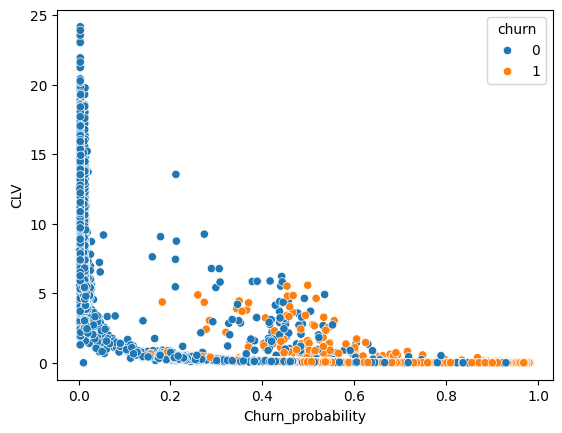

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df_clv['Churn_probability'],y=df_clv['CLV'],hue=df_clv['churn'])